Task 2 : Implement a region-growing technique for image segmentation. The basic idea is to 
start from a set of points inside the object of interest (foreground), denoted as seeds, 
and recursively add neighboring pixels as long as they are in a pre-defined range of 
the pixel values of the seeds. 

Import Required Libraries

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from collections import deque


Load Image (Use Noisy Image from Task 1)

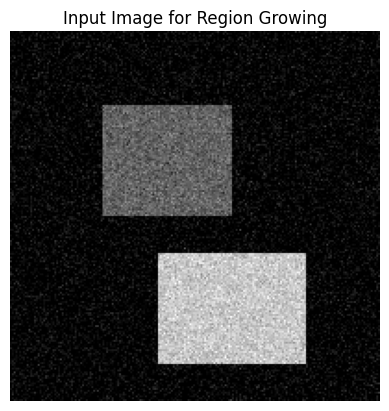

In [88]:
image_path = '../outputs/task1/noisy_image.png'  # Reuse output from Task 1
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title("Input Image for Region Growing")
plt.axis('off')
plt.show()


Region Growing Algorithm

In [89]:
def region_growing(image, seed, threshold=10):
    """
    Perform region growing from the seed point using intensity similarity.
    :param image: Grayscale image
    :param seed: (x, y) coordinates
    :param threshold: Max difference from seed value to allow inclusion
    :return: Binary mask of the segmented region
    """
    h, w = image.shape
    seed_value = image[seed[1], seed[0]]  # (x, y) format
    visited = np.zeros_like(image, dtype=bool)
    mask = np.zeros_like(image, dtype=np.uint8)
    
    q = deque()
    q.append(seed)

    while q:
        x, y = q.popleft()
        if visited[y, x]:
            continue

        visited[y, x] = True
        if abs(int(image[y, x]) - int(seed_value)) <= threshold:
            mask[y, x] = 255
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < w and 0 <= ny < h and not visited[ny, nx]:
                        q.append((nx, ny))

    return mask


Run Region Growing from a Seed

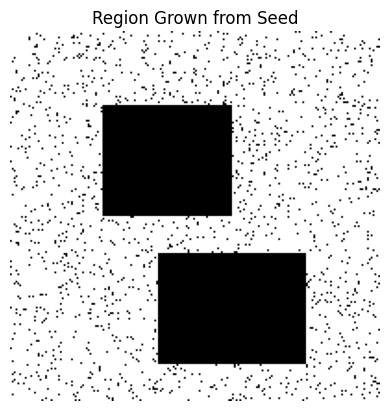

In [90]:
seed_point = (4, 0)  # (x, y) coordinate inside object
threshold = 30  # Intensity threshold for region growing

segmented_mask = region_growing(img, seed=seed_point, threshold=threshold)

plt.imshow(segmented_mask, cmap='gray')
plt.title("Region Grown from Seed")
plt.axis('off')
plt.show()


Save the Result

In [91]:
output_dir = '../outputs/task2'
os.makedirs(output_dir, exist_ok=True)

cv2.imwrite(os.path.join(output_dir, 'region_grown.png'), segmented_mask)
print("Region-growing result saved to:", output_dir)


Region-growing result saved to: ../outputs/task2
